In [5]:
from sklearn.model_selection import train_test_split
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [6]:
data = pd.read_csv(r'E:\backup2\Data science\projects_data_science\boston\boston.csv', sep = '\t')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
data.dtypes
data['medv'] = data['medv'].astype(int)

In [8]:
set(data['chas'])

{0, 1}

In [9]:
data.describe()
data.shape

(506, 14)

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (12,7))
sns.distplot(data.medv, bins = 50)

In [ ]:
print('skew is ', data.medv.skew())

In [ ]:
numeric_features = data.select_dtypes(include = [np.number])
numeric_features.dtypes
corr = numeric_features.corr()
corr

In [ ]:
f, ax = plt.subplots(figsize = (12,9))
sns.heatmap(corr, vmax = 1, square = True)

In [ ]:
data['chas'].value_counts(normalize=True).plot(kind='bar')

In [ ]:
unique = len(set(data['age']))
total = len(data['age'])

repeated = total - unique
print(unique)
print(repeated)

In [ ]:
plt.figure(figsize = (12,7))
plt.xlabel('b')
plt.ylabel('medv')
plt.plot(data.b, data['medv'], '.', alpha = 0.3)


In [ ]:
plt.figure(figsize = (12,7))
plt.xlabel('lstat')
plt.ylabel('medv')
plt.plot(data.lstat, data['medv'], '.', alpha = 0.3)

In [ ]:
plt.figure(figsize = (12,7))
plt.xlabel('rm')
plt.ylabel('medv')
plt.plot(data.rm, data['medv'], '.', alpha = 0.3)

In [ ]:
# rm_pivot = \
# data.pivot_table(index = 'rm', values = 'medv', aggfunc = np.median)

# rm_pivot.plot(kind= 'bar', color= 'blue', figsize = (12,7))
# plt.xticks(rotation = 90)
# plt.show()

In [ ]:
data['medv'].isna().sum()

In [337]:
# sns.pairplot(data, size=2.5)
# plt.tight_layout()

In [1]:
from sklearn.metrics import r2_score
def perf_checker(y_true, y_predict):
    r_score = r2_score(y_true, y_predict)
data.shape

NameError: name 'data' is not defined

In [339]:
prices = data['medv']
features = data[['zn', 'b', 'rm', 'dis']]

X_train, X_test, y_train, y_test = train_test_split(features, prices, random_state = 5)


In [340]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

# fruit_prediction = knn.predict([[20, 4.3, 5.5]])

0.06299212598425197

([<matplotlib.axis.XTick at 0x29488dd34e0>,
 <a list of 5 Text xticklabel objects>)

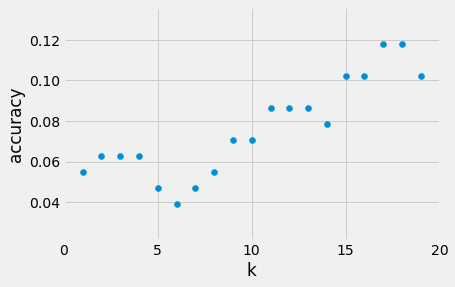

In [341]:
k_range = range(1,20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

In [342]:

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))




Accuracy of Logistic regression classifier on training set: 0.13
Accuracy of Logistic regression classifier on test set: 0.10


In [343]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.18


In [344]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.18
Accuracy of LDA classifier on test set: 0.09


In [345]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.17
Accuracy of GNB classifier on test set: 0.06


In [346]:
from sklearn.svm import LinearSVC

    
svm = LinearSVC()
svm.fit(X_train, y_train)

print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))




Accuracy of SVM classifier on training set: 0.09
Accuracy of SVM classifier on test set: 0.07


In [347]:
# from sklearn.preprocessing import StandardScaler
# print(X_train.shape)
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)
print(X_test.shape)
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print(reg.score(X_test, y_test))

(127, 4)
0.5603484208759026


In [348]:
X_train.shape

(379, 4)

In [349]:
from sklearn.decomposition import PCA
target = data['medv']
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [350]:
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[9.39197163e-01 6.04906596e-02 2.61537684e-04 5.06393854e-05]


In [351]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
# print(X_test)

In [352]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(y_pred)

[19 22 19 13 22 14 21 19 19 19 19 19 19 22 22 19 14 19 19 13 20 19 19 19
 22 14 19 19 19 20 19 19 21 19 20 21 19 14 20 22 21 13 19 14 22 22 14 19
 19 19 19 19 19 14 14 22 19 14 19 22 21 19 19 19 19 11 19 19 19 19 19 19
 19 14 19 22 14 19 22 20 19 19 19 14 22 14 19 11 19 22 19 19 19 19 19 22
 14 22 19 14 19 20 19 22 14 21 19 19 22 19 22 19 19 20 19 14 19 22 19 20
 19 22 19 22 22 19 19]


In [353]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
0.06299212598425197
